# Importando os Dados e Bibliotecas

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
! pip install codecarbon

In [169]:
from codecarbon import EmissionsTracker

codecarbon_output = "/content/drive/MyDrive/Trabalho Topicos IA1/codecarbon_emissions.csv"

In [2]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho Topicos IA1/final_inmet_data.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147144 entries, 0 to 147143
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Unnamed: 0.1                                           147144 non-null  int64  
 1   Unnamed: 0                                             147144 non-null  int64  
 2   DATA                                                   147144 non-null  object 
 3   HORA                                                   147144 non-null  object 
 4   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           147144 non-null  float64
 5   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             147144 non-null  float64
 6   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             147144 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    147144 non-null  float64
 8   UMIDADE REL. MAX. NA HORA ANT. (AU

# Pre-processamento

In [17]:
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='Unnamed: 0.1')

df['DATA'] = pd.to_datetime(df['DATA'], format='%Y-%m-%d')
df['HORA'] = df['HORA'].replace(':', '.', regex=True).astype(float)

df['Ano'] = df['DATA'].dt.year
df['Mês'] = df['DATA'].dt.month

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147144 entries, 0 to 147143
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   DATA                                                   147144 non-null  datetime64[ns]
 1   HORA                                                   147144 non-null  float64       
 2   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           147144 non-null  float64       
 3   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             147144 non-null  float64       
 4   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             147144 non-null  float64       
 5   UMIDADE RELATIVA DO AR, HORARIA (%)                    147144 non-null  float64       
 6   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               147144 non-null  float64       
 7   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               1

In [18]:
contagem_zeros_por_ano = df.groupby('Ano')['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].apply(lambda x: (x == 0).sum())

print("Número de vezes que o valor 0 aparece na coluna de temperatura por ano:")
print(contagem_zeros_por_ano)

Número de vezes que o valor 0 aparece na coluna de temperatura por ano:
Ano
2007    148
2008    105
2009     29
2010    413
2011    126
2012     13
2013     27
2014      7
2015     97
2016      3
2017     39
2018      3
2019      0
2020      0
2021      0
2022      0
2023      0
2024      0
Name: TEMPERATURA DO AR - BULBO SECO, HORARIA (°C), dtype: int64


In [19]:
df = df[df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'] != 0]

idx_min_temp = df.groupby('Ano')['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].idxmin()

dia_menos_quente = df.loc[idx_min_temp, ['Ano', 'DATA', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']]

print(dia_menos_quente)

         Ano       DATA  TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)
1748    2007 2007-07-29                                          14.3
11744   2008 2008-09-18                                          15.7
19848   2009 2009-08-22                                          16.4
26934   2010 2010-06-13                                          16.1
36321   2011 2011-07-09                                          15.1
47010   2012 2012-09-26                                          15.7
54236   2013 2013-07-24                                          14.5
63488   2014 2014-08-14                                          15.0
71284   2015 2015-07-05                                          16.5
79545   2016 2016-06-13                                          15.1
89965   2017 2017-08-21                                          15.9
98863   2018 2018-08-27                                          16.8
107077  2019 2019-08-04                                          15.5
116316  2020 2020-08

In [20]:
contagem_zeros_por_ano = df.groupby('Ano')['UMIDADE RELATIVA DO AR, HORARIA (%)'].apply(lambda x: (x == 0).sum())

print("Número de vezes que o valor 0 aparece na coluna de temperatura por ano:")
print(contagem_zeros_por_ano)

Número de vezes que o valor 0 aparece na coluna de temperatura por ano:
Ano
2007       0
2008       0
2009       2
2010    3601
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
2024       0
Name: UMIDADE RELATIVA DO AR, HORARIA (%), dtype: int64


In [21]:
df = df[df['UMIDADE RELATIVA DO AR, HORARIA (%)'] != 0]

contagem_zeros_por_ano = df.groupby('Ano')['UMIDADE RELATIVA DO AR, HORARIA (%)'].apply(lambda x: (x == 0).sum())

print("Número de vezes que o valor 0 aparece na coluna de temperatura por ano:")
print(contagem_zeros_por_ano)

Número de vezes que o valor 0 aparece na coluna de temperatura por ano:
Ano
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
Name: UMIDADE RELATIVA DO AR, HORARIA (%), dtype: int64


# Analise Exploratoria

In [149]:
resultados = []

for ano, grupo_ano in df.groupby('Ano'):
    media_temperaturas_por_mes = grupo_ano.groupby('Mês')['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean()

    mes_mais_quente = media_temperaturas_por_mes.idxmax()

    media_mais_quente = media_temperaturas_por_mes.max()

    resultados.append({'Ano': ano, 'Mês': mes_mais_quente, 'Média de Temperatura': media_mais_quente})

resultados = pd.DataFrame(resultados)

resultados['Média de Temperatura'] = resultados['Média de Temperatura'].round(2)

print(resultados)

     Ano  Mês  Média de Temperatura
0   2007   12                 25.08
1   2008    2                 24.75
2   2009   11                 26.69
3   2010    1                 28.23
4   2011    1                 26.55
5   2012   12                 26.06
6   2013    2                 26.43
7   2014    1                 26.86
8   2015    1                 28.75
9   2016    2                 27.17
10  2017    1                 28.90
11  2018    3                 26.84
12  2019    1                 27.52
13  2020    1                 26.57
14  2021    3                 26.31
15  2022    3                 26.10
16  2023    2                 26.50
17  2024    2                 26.98


In [150]:
resultados = []

for ano, grupo_ano in df.groupby('Ano'):
    media_temperaturas_por_mes = grupo_ano.groupby('Mês')['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean()

    mes_mais_frio = media_temperaturas_por_mes.idxmin()

    media_mais_fria = media_temperaturas_por_mes.min()

    resultados.append({'Ano': ano, 'Mês': mes_mais_frio, 'Média de Temperatura': media_mais_fria})

resultados = pd.DataFrame(resultados)

resultados['Média de Temperatura'] = resultados['Média de Temperatura'].round(2)

print(resultados)

     Ano  Mês  Média de Temperatura
0   2007    5                 21.03
1   2008    9                 21.20
2   2009    7                 21.18
3   2010    6                 21.28
4   2011    9                 20.47
5   2012    8                 21.01
6   2013    7                 21.02
7   2014    7                 21.14
8   2015    8                 21.40
9   2016    6                 20.15
10  2017    8                 20.42
11  2018    8                 20.87
12  2019    8                 21.16
13  2020    8                 21.82
14  2021    7                 20.60
15  2022    9                 20.79
16  2023    7                 21.60
17  2024    1                 26.00


In [151]:
df.head(75)

,DATA,HORA,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),...,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"VENTO, VELOCIDADE HORARIA (m/s)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)",RADIACAO GLOBAL (KJ/m²),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",Ano,Mês
18,2007-05-18,18.0,23.5,23.8,23.5,86.0,87.0,85.0,21.1,21.2,...,1010.0,1010.1,1010.0,4.6,224.0,6.4,100.8,0.0,2007,5
19,2007-05-18,19.0,23.2,23.3,23.2,87.0,88.0,86.0,21.0,21.1,...,1010.4,1010.4,1010.3,5.5,234.0,7.9,35.6,0.0,2007,5
35,2007-05-19,11.0,23.6,23.6,23.1,77.0,77.0,74.0,19.3,19.3,...,1013.2,1013.2,1013.1,0.4,37.0,2.0,91.2,0.0,2007,5
36,2007-05-19,12.0,23.9,23.9,23.6,82.0,82.0,77.0,20.6,20.6,...,1013.5,1013.5,1013.2,0.9,104.0,1.5,141.0,0.0,2007,5
37,2007-05-19,13.0,25.0,25.0,24.3,71.0,74.0,71.0,19.3,19.5,...,1013.8,1013.9,1013.8,3.9,239.0,5.4,428.8,0.0,2007,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2007-05-23,7.0,22.2,22.2,22.1,90.0,92.0,90.0,20.4,20.7,...,1004.9,1005.0,1004.9,0.6,52.0,2.0,0.0,0.0,2007,5
128,2007-05-23,8.0,22.4,22.4,22.1,87.0,87.0,87.0,20.1,20.1,...,1004.7,1004.8,1004.7,0.5,336.0,1.2,0.0,0.0,2007,5
129,2007-05-23,9.0,22.3,22.5,22.3,86.0,87.0,86.0,19.9,20.2,...,1005.0,1005.0,1004.8,0.6,339.0,1.7,0.0,0.0,2007,5
130,2007-05-23,10.0,22.5,22.7,22.5,86.0,87.0,85.0,20.2,20.2,...,1005.1,1005.2,1005.1,0.3,42.0,1.5,15.0,0.0,2007,5


Valores de correlação para a coluna 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)':


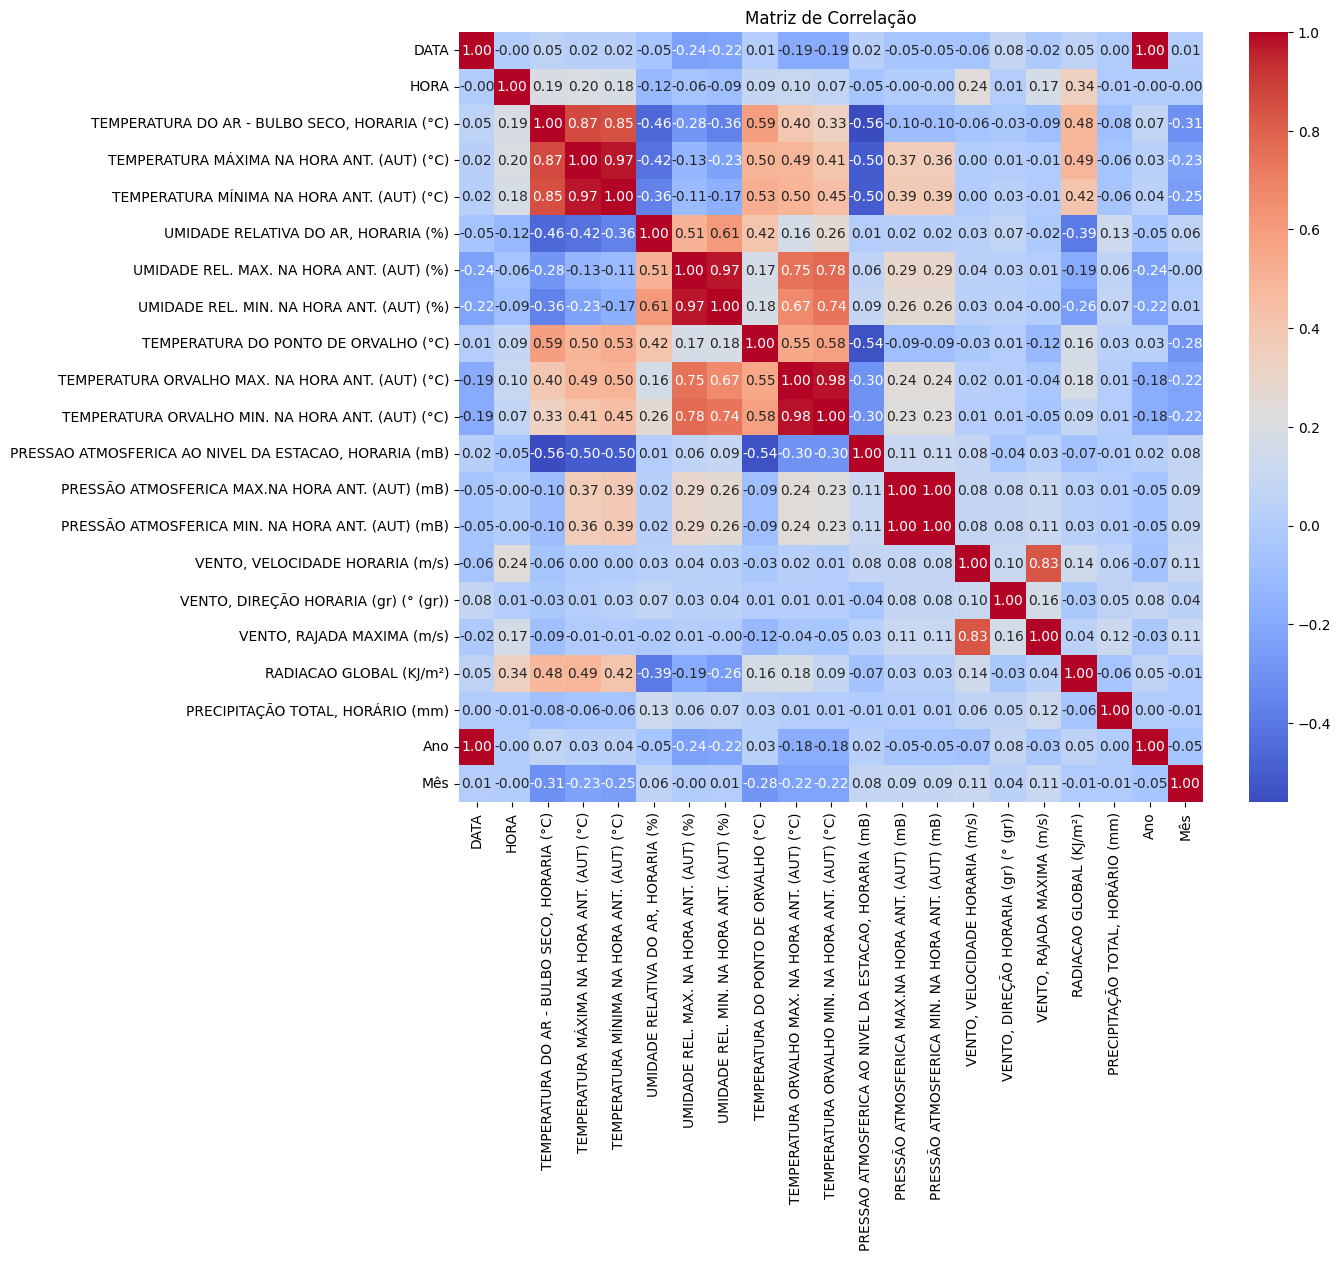

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

#df = df.drop(columns=['Ano', 'Mês'])

correlation_matrix = df.corr()

correlation_matrix = correlation_matrix.round(2)
print("Valores de correlação para a coluna 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)':")

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [153]:
correlacoes_temperatura = correlation_matrix['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']
print(correlacoes_temperatura)

DATA                                                     0.05
HORA                                                     0.19
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             1.00
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               0.87
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               0.85
UMIDADE RELATIVA DO AR, HORARIA (%)                     -0.46
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                -0.28
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                -0.36
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0.59
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0.40
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0.33
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   -0.56
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)         -0.10
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)        -0.10
VENTO, VELOCIDADE HORARIA (m/s)                         -0.06
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                    -0.03
VENTO, R

In [154]:
temperatura_correlation = correlation_matrix['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']

maiores_correlacoes_absolutas = temperatura_correlation.abs().sort_values(ascending=False)

maiores_correlacoes = maiores_correlacoes_absolutas[maiores_correlacoes_absolutas.index != 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']

print("Maiores correlações com a temperatura:")
print(maiores_correlacoes)

Maiores correlações com a temperatura:
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               0.87
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               0.85
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0.59
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0.56
RADIACAO GLOBAL (KJ/m²)                                  0.48
UMIDADE RELATIVA DO AR, HORARIA (%)                      0.46
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0.40
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 0.36
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0.33
Mês                                                      0.31
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 0.28
HORA                                                     0.19
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          0.10
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         0.10
VENTO, RAJADA MAXIMA (m/s)                               0.09
PRECIPITAÇÃO TOTAL, HORÁRIO (mm

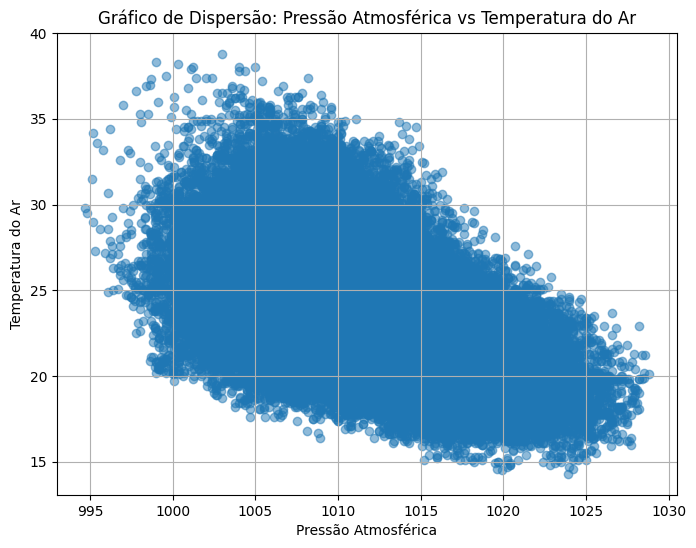

In [155]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'], df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], alpha=0.5)
plt.title('Gráfico de Dispersão: Pressão Atmosférica vs Temperatura do Ar')
plt.xlabel('Pressão Atmosférica')
plt.ylabel('Temperatura do Ar')
plt.grid(True)
plt.show()

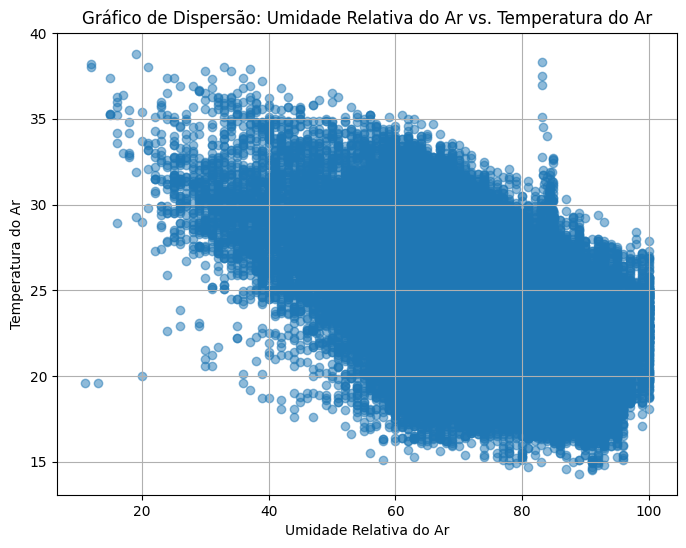

In [156]:
plt.figure(figsize=(8, 6))
plt.scatter(df['UMIDADE RELATIVA DO AR, HORARIA (%)'], df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], alpha=0.5)
plt.title('Gráfico de Dispersão: Umidade Relativa do Ar vs. Temperatura do Ar')
plt.xlabel('Umidade Relativa do Ar')
plt.ylabel('Temperatura do Ar')
plt.grid(True)
plt.show()

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142531 entries, 18 to 147143
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   DATA                                                   142531 non-null  datetime64[ns]
 1   HORA                                                   142531 non-null  float64       
 2   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           142531 non-null  float64       
 3   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             142531 non-null  float64       
 4   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             142531 non-null  float64       
 5   UMIDADE RELATIVA DO AR, HORARIA (%)                    142531 non-null  float64       
 6   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               142531 non-null  float64       
 7   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               14253

# Linear Regression

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#UMIDADE RELATIVA DO AR, HORARIA (%) TEMPERATURA DO PONTO DE ORVALHO (°C) PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB) RADIACAO GLOBAL (KJ/m²)

X = df[['RADIACAO GLOBAL (KJ/m²)', 'Mês',
        'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
        'UMIDADE RELATIVA DO AR, HORARIA (%)']]
y = df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Erro quadrático médio (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)
print("Erro médio absoluto (MAE):", mae)

Erro quadrático médio (MSE): 3.2151942379639076
Coeficiente de determinação (R²): 0.6637635427021635
Erro médio absoluto (MAE): 1.4058536833086703


In [300]:
tvalues = y_test.values
tvalues

array([20.8, 26.6, 24.4, ..., 29. , 19.6, 19.4])

In [301]:
predictions_df1 = pd.DataFrame(np.ravel(y_pred),columns=["Predictions"])
comparison_df1 = pd.concat([pd.DataFrame(tvalues,columns=["Real Values"]), predictions_df1],axis=1)
comparison_df1

,Real Values,Predictions
0,20.8,21.151709
1,26.6,25.392473
2,24.4,23.831859
3,21.9,22.028877
4,24.3,21.851631
...,...,...
28502,20.4,22.034362
28503,26.3,25.334224
28504,29.0,24.963081
28505,19.6,21.129885


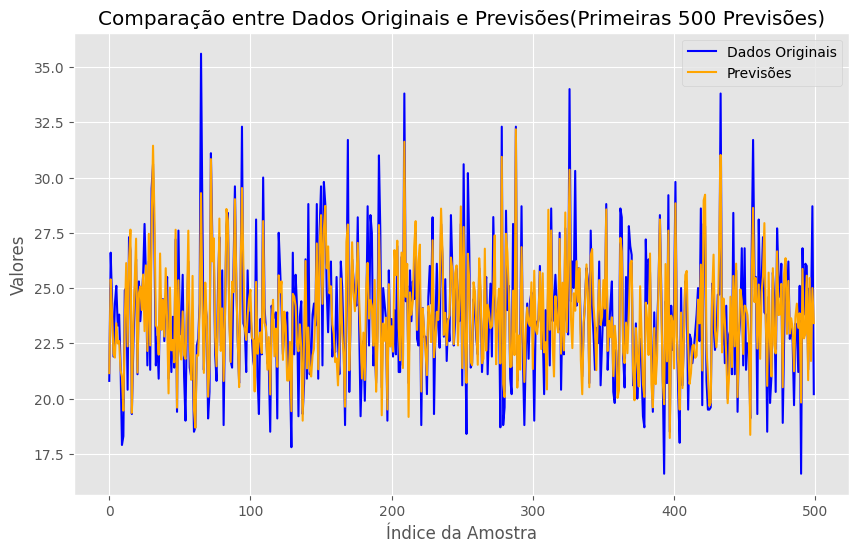

In [304]:
num_previsoes = 500
indices_selecionados = np.arange(num_previsoes)

plt.figure(figsize=(10, 6))
plt.plot(indices_selecionados, comparison_df1['Real Values'].iloc[:num_previsoes], color='blue', label='Dados Originais')
plt.plot(indices_selecionados, comparison_df1['Predictions'].iloc[:num_previsoes], color='orange', label='Previsões')
plt.title('Comparação entre Dados Originais e Previsões(Primeiras 500 Previsões)')
plt.xlabel('Índice da Amostra')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

# RNA

In [256]:
y = df["TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"].values
X = X.values
print(X)
print(y)

[[ 100.8    5.  1010.    86. ]
 [  35.6    5.  1010.4   87. ]
 [  91.2    5.  1013.2   77. ]
 ...
 [   0.     2.  1004.5   95. ]
 [   0.     2.  1003.2   93. ]
 [   0.     2.  1004.    85. ]]
[23.5 23.2 23.6 ... 26.9 26.8 27.7]


In [257]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(114024, 4)
(28507, 4)
(114024,)
(28507,)


In [258]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_train)
print(X_test)

[[-0.6426634  -0.72423475 -1.29117399  0.37767962]
 [-0.64135306 -1.30017572  0.17892856  1.27183867]
 [-0.6426634  -0.43626427  1.46001792 -0.24823171]
 ...
 [-0.64256981  0.71561766  2.04805894 -0.60589533]
 [ 2.784727    1.57952911 -0.45111539 -2.84129293]
 [-0.6426634   1.00358815 -2.02622526 -1.05297485]]
[[ 0.18294655  0.71561766  0.89297837  0.64592734]
 [ 1.34250688 -1.01220524  0.22093149 -0.0693999 ]
 [-0.6426634  -1.01220524  0.01091684 -0.1588158 ]
 ...
 [-0.54916104 -0.72423475 -0.45111539 -0.69531123]
 [-0.64154025  1.29155863 -0.11509195  1.00359095]
 [-0.6426634   1.29155863 -0.30410513  0.28826372]]


In [259]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

ann = Sequential()
ann.add(Dense(units=6, activation="relu"))
ann.add(Dense(units=6, activation="relu"))
ann.add(Dense(units=1))

In [260]:
ann.compile(optimizer="adam",loss="mean_squared_error")

In [261]:
tracker = EmissionsTracker(
    project_name="treino com ANN",
    output_file=codecarbon_output,
    measure_power_secs=0,
    log_level='critical'
)

tracker.start()

ann.fit(x = X_train, y = y_train, epochs = 100, batch_size = 32, validation_data = (X_test,y_test), callbacks = EarlyStopping(monitor = 'val_loss', patience = 4))

emissions: float = tracker.stop()
print(f"emissions={emissions}")

Epoch 1/100
3564/3564 [==============================] - 22s 6ms/step - loss: 47.3139 - val_loss: 3.1825
Epoch 2/100
3564/3564 [==============================] - 22s 6ms/step - loss: 2.9243 - val_loss: 2.8379
Epoch 3/100
3564/3564 [==============================] - 24s 7ms/step - loss: 2.7922 - val_loss: 2.7901
Epoch 4/100
3564/3564 [==============================] - 20s 6ms/step - loss: 2.7480 - val_loss: 2.7479
Epoch 5/100
3564/3564 [==============================] - 20s 6ms/step - loss: 2.6893 - val_loss: 2.6980
Epoch 6/100
3564/3564 [==============================] - 20s 5ms/step - loss: 2.6156 - val_loss: 2.6460
Epoch 7/100
3564/3564 [==============================] - 20s 6ms/step - loss: 2.5874 - val_loss: 2.6223
Epoch 8/100
3564/3564 [==============================] - 21s 6ms/step - loss: 2.5801 - val_loss: 2.6130
Epoch 9/100
3564/3564 [==============================] - 21s 6ms/step - loss: 2.5766 - val_loss: 2.6059
Epoch 10/100
3564/3564 [==============================] - 20s 6

<Axes: >

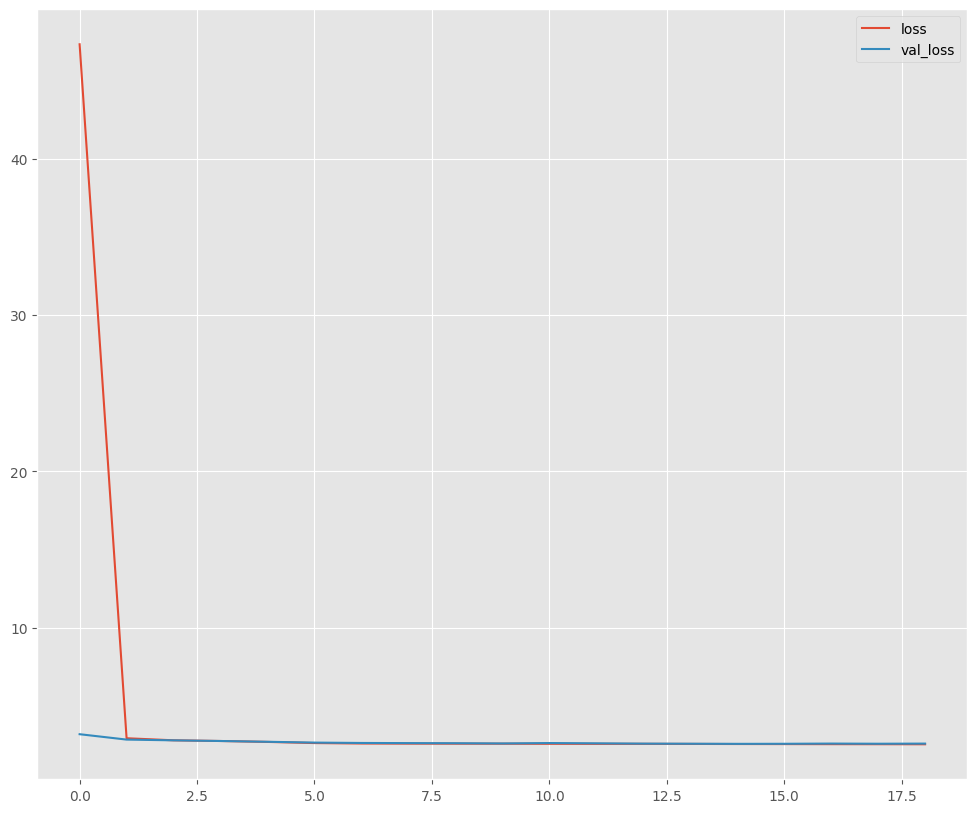

In [262]:
plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))

In [263]:
ann.evaluate(X_train,y_train)

3564/3564 [==============================] - 17s 5ms/step - loss: 2.5538


2.5537519454956055

In [264]:
ann.evaluate(X_test,y_test)

891/891 [==============================] - 4s 4ms/step - loss: 2.5816


2.581627130508423

In [265]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df

891/891 [==============================] - 4s 4ms/step


,Real Values,Predictions
0,20.8,21.259905
1,26.6,26.412367
2,24.4,24.530035
3,21.9,22.949150
4,24.3,22.339182
...,...,...
28502,20.4,21.526104
28503,26.3,25.938959
28504,29.0,24.693237
28505,19.6,21.994982


In [271]:
comparison_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28507 entries, 0 to 28506
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Real Values  28507 non-null  float64
 1   Predictions  28507 non-null  float32
dtypes: float32(1), float64(1)
memory usage: 334.2 KB


In [277]:
#num_linhas = comparison_df.shape[0]
num_linhas = comparison_df.shape[0]

# Criar um array NumPy com os índices das linhas
indices_linhas = np.arange(num_linhas)
#array_num_linhas = np.array([num_linhas])
#print(array_num_linhas)
print(indices_linhas)

[    0     1     2 ... 28504 28505 28506]


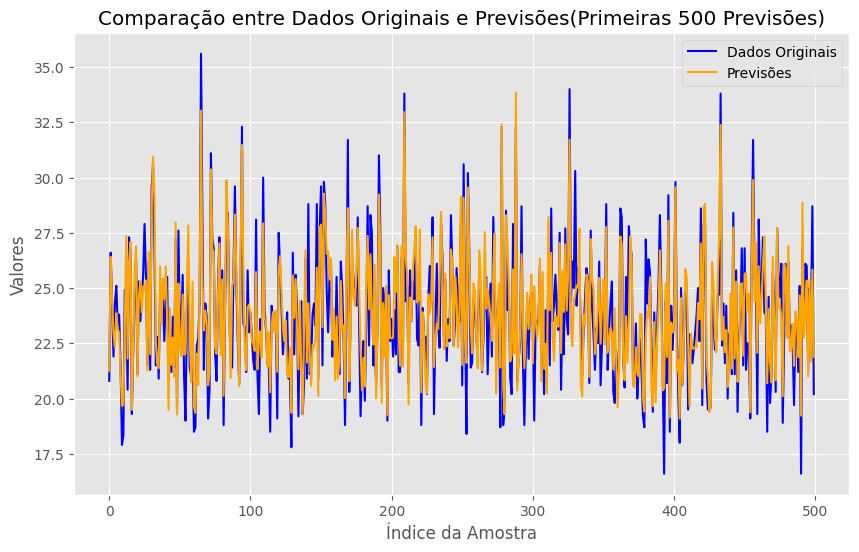

In [281]:
num_previsoes = 500
indices_selecionados = np.arange(num_previsoes)

plt.figure(figsize=(10, 6))
plt.plot(indices_selecionados, comparison_df['Real Values'].iloc[:num_previsoes], color='blue', label='Dados Originais')
plt.plot(indices_selecionados, comparison_df['Predictions'].iloc[:num_previsoes], color='orange', label='Previsões')
plt.title('Comparação entre Dados Originais e Previsões(Primeiras 500 Previsões)')
plt.xlabel('Índice da Amostra')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

In [266]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, predictions)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 1.606744363834959
MAE: 1.2631839092676571


# Pré-processamento 2

In [22]:
periodos = df.copy()
periodos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142531 entries, 18 to 147143
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   DATA                                                   142531 non-null  datetime64[ns]
 1   HORA                                                   142531 non-null  float64       
 2   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           142531 non-null  float64       
 3   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             142531 non-null  float64       
 4   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             142531 non-null  float64       
 5   UMIDADE RELATIVA DO AR, HORARIA (%)                    142531 non-null  float64       
 6   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               142531 non-null  float64       
 7   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               14253

In [23]:
intervalos = {
    'Manhã': range(7, 12),
    'Tarde': range(12, 18),
    'Noite': range(18, 24),
    'Madrugada': [*range(0, 7), 24]
}

df_manha = df[df['HORA'].isin(intervalos['Manhã'])]
df_tarde = df[df['HORA'].isin(intervalos['Tarde'])]
df_noite = df[df['HORA'].isin(intervalos['Noite'])]
df_madrugada = df[df['HORA'].isin(intervalos['Madrugada'])]

df_madrugada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41484 entries, 72 to 147140
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   DATA                                                   41484 non-null  datetime64[ns]
 1   HORA                                                   41484 non-null  float64       
 2   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           41484 non-null  float64       
 3   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             41484 non-null  float64       
 4   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             41484 non-null  float64       
 5   UMIDADE RELATIVA DO AR, HORARIA (%)                    41484 non-null  float64       
 6   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               41484 non-null  float64       
 7   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               41484 non-null 

In [24]:
df_manha_media = df_manha.groupby('DATA')['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean().reset_index()

# Renomeando as colunas
df_manha_media.columns = ['DATA', 'MEDIA_TEMPERATURA']
df_manha_media.head(15)

,DATA,MEDIA_TEMPERATURA
0,2007-05-19,23.600
1,2007-05-21,21.675
2,2007-05-22,23.720
3,2007-05-23,22.560
4,2007-05-24,19.140
5,2007-05-25,18.520
6,2007-05-26,18.460
7,2007-05-27,19.140
8,2007-05-28,20.560
9,2007-05-29,20.480


In [25]:
novas_linhas = []

for idx, row in df_manha_media.iterrows():

    if idx < len(df_manha_media) - 1 and (df_manha_media.loc[idx + 1, 'DATA'] - row['DATA']).days > 1:

        data_inicial = row['DATA']
        data_final = df_manha_media.loc[idx + 1, 'DATA']
        temperatura_inicial = row['MEDIA_TEMPERATURA']
        temperatura_final = df_manha_media.loc[idx + 1, 'MEDIA_TEMPERATURA']
        temperatura_media = (temperatura_inicial + temperatura_final) / 2


        nova_linha = {'DATA': data_inicial + pd.DateOffset(days=1), 'MEDIA_TEMPERATURA': temperatura_media}
        novas_linhas.append(nova_linha)


df_manha_media = pd.concat([df_manha_media, pd.DataFrame(novas_linhas)], ignore_index=True)

df_manha_media = df_manha_media.sort_values(by='DATA')

df_manha_media.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5994 entries, 0 to 5954
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATA               5994 non-null   datetime64[ns]
 1   MEDIA_TEMPERATURA  5994 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.5 KB


In [26]:
df_manha_media['MEDIA_TEMPERATURA'] = df_manha_media['MEDIA_TEMPERATURA'].round(2)
df_manha_media.head(100)

,DATA,MEDIA_TEMPERATURA
0,2007-05-19,23.60
5955,2007-05-20,22.64
1,2007-05-21,21.68
2,2007-05-22,23.72
3,2007-05-23,22.56
...,...,...
94,2007-08-22,18.56
95,2007-08-23,20.20
96,2007-08-24,19.76
97,2007-08-25,22.28


In [29]:
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None):
    """to plot the series"""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Year")
    plt.ylabel("Temperature")
    plt.grid(True)

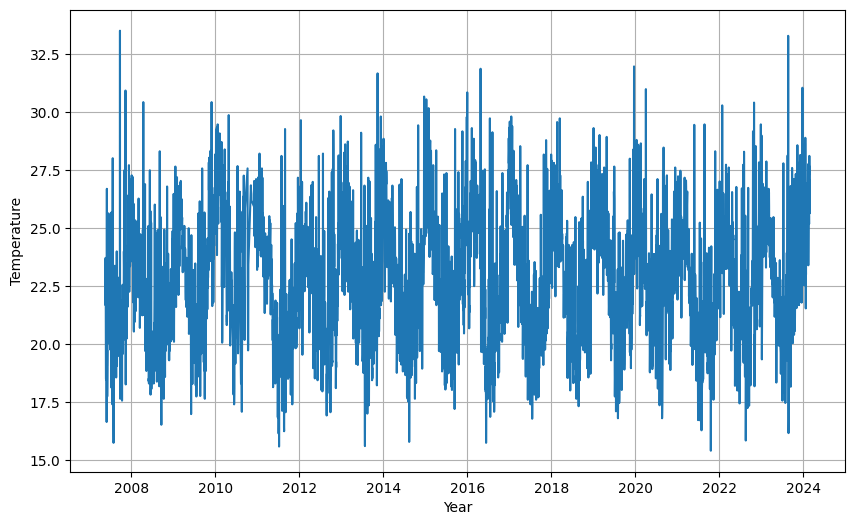

In [30]:
time_step = df_manha_media["DATA"].tolist()
temperature = df_manha_media["MEDIA_TEMPERATURA"].tolist()

series = np.array(temperature)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

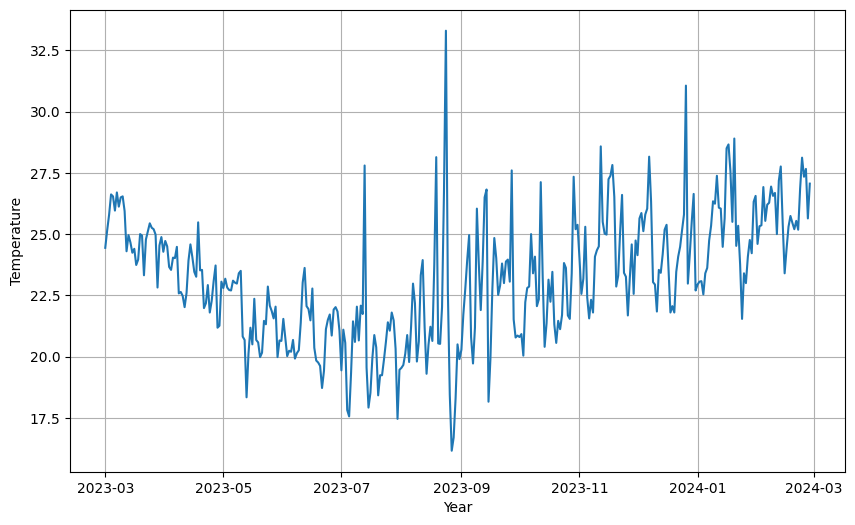

In [31]:
plt.figure(figsize=(10, 6))
plot_series(time[-365:], series[-365:])

In [32]:
df_manha_media.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5994 entries, 0 to 5954
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATA               5994 non-null   datetime64[ns]
 1   MEDIA_TEMPERATURA  5994 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.5 KB


In [33]:
split_time = 4795
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [34]:
print(time_train)

[Timestamp('2007-05-19 00:00:00') Timestamp('2007-05-20 00:00:00')
 Timestamp('2007-05-21 00:00:00') ... Timestamp('2020-11-14 00:00:00')
 Timestamp('2020-11-15 00:00:00') Timestamp('2020-11-16 00:00:00')]


# Naive Forecast

In [36]:
naive_forecast = series[split_time - 1:-1]

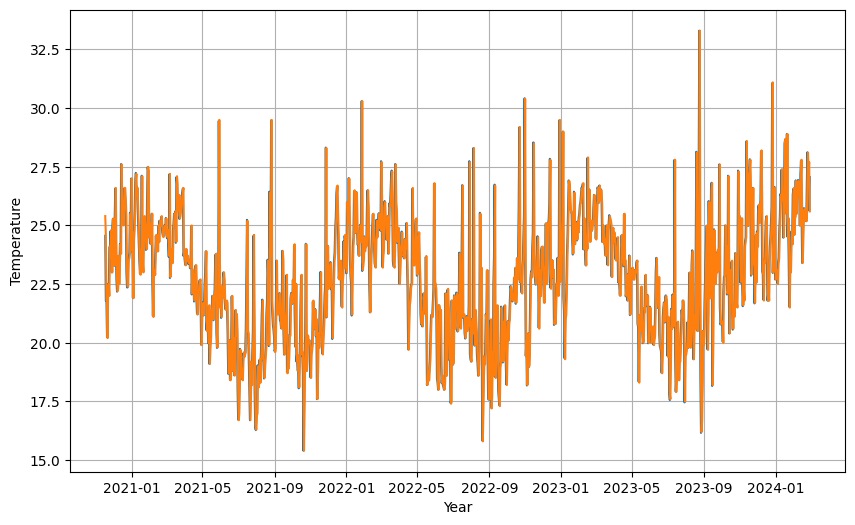

In [37]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

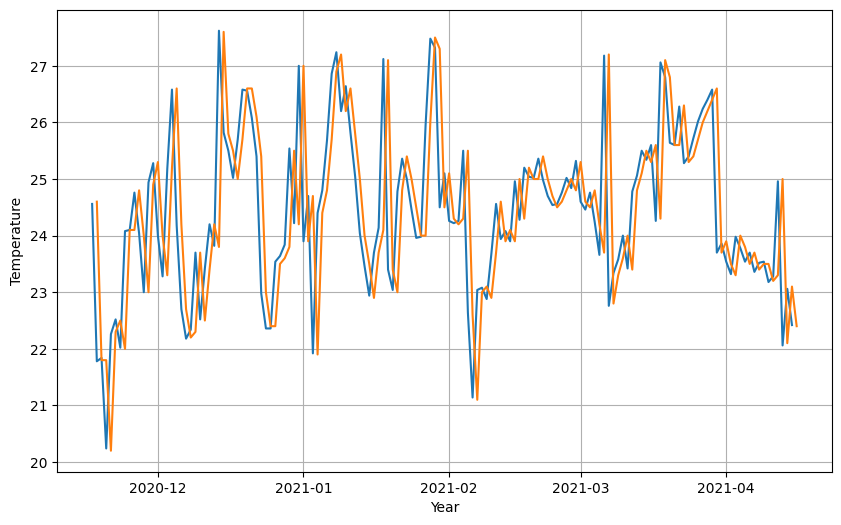

In [38]:
#Zoom in and see only few points
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

3.2408367806505423
1.1891492910758965


In [40]:
def moving_average_forecast(series, window_size):
    """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)

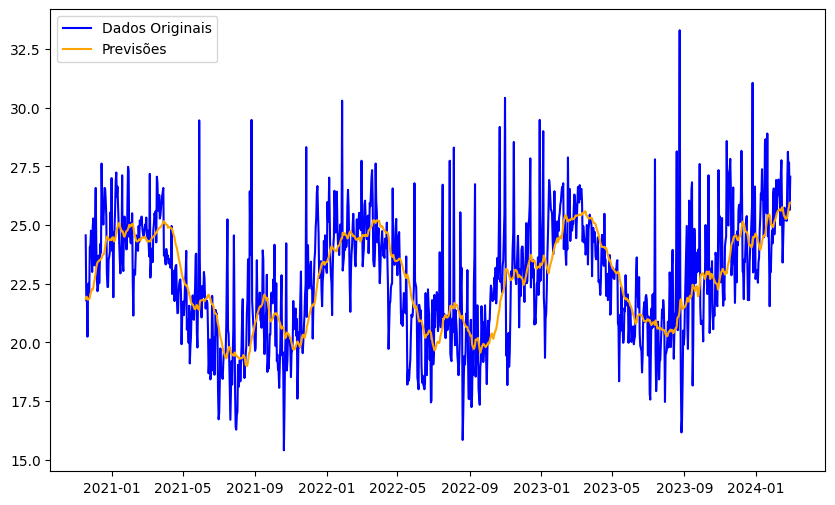

In [41]:
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plt.figure(figsize=(10, 6))
plt.plot(time_valid, x_valid, color='blue', label='Dados Originais')
plt.plot(time_valid, moving_avg, color='orange', label='Previsões')
plt.legend()
plt.show()

In [42]:
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

3.6752953294412003
1.4204197942730055


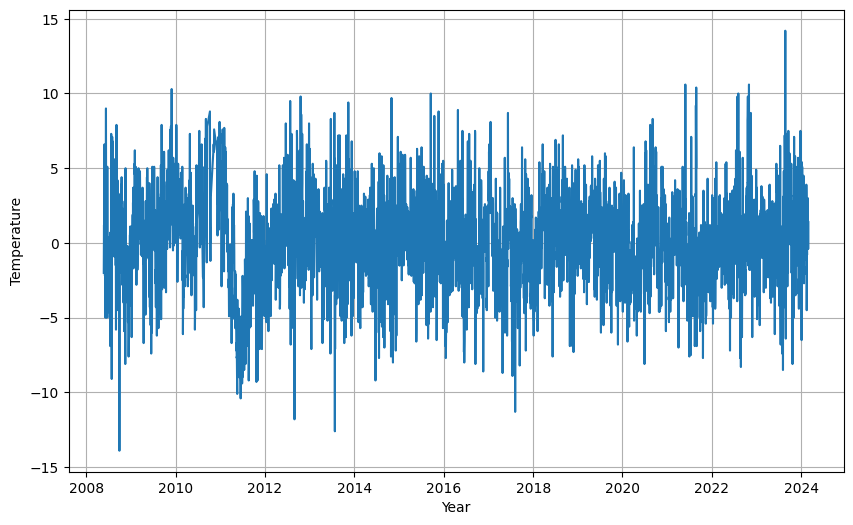

In [43]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

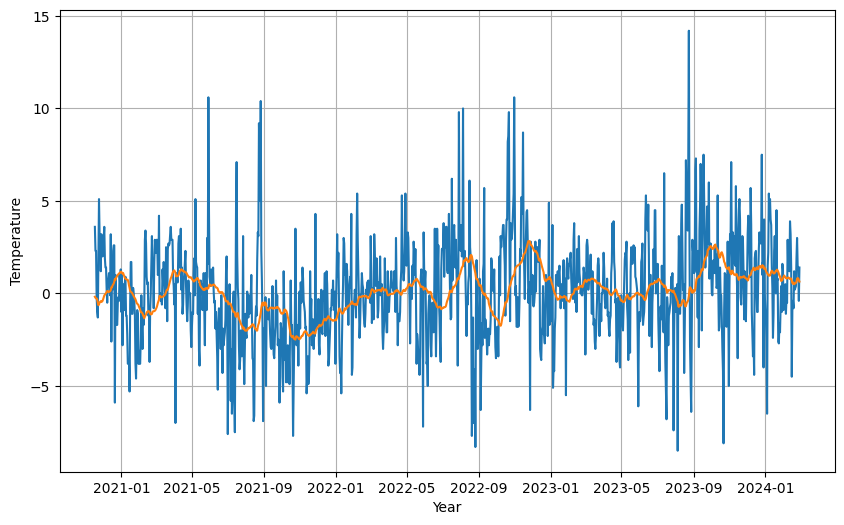

In [44]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

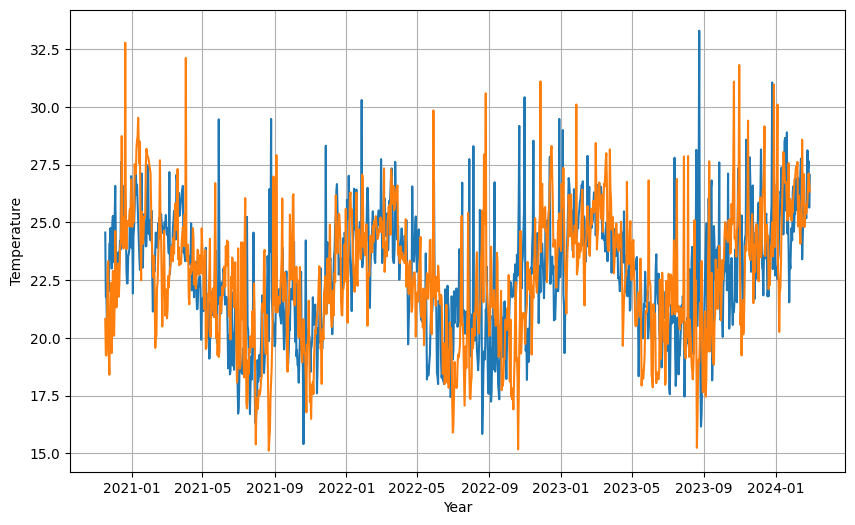

In [45]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [46]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

7.320669180984153
2.0117047539616353


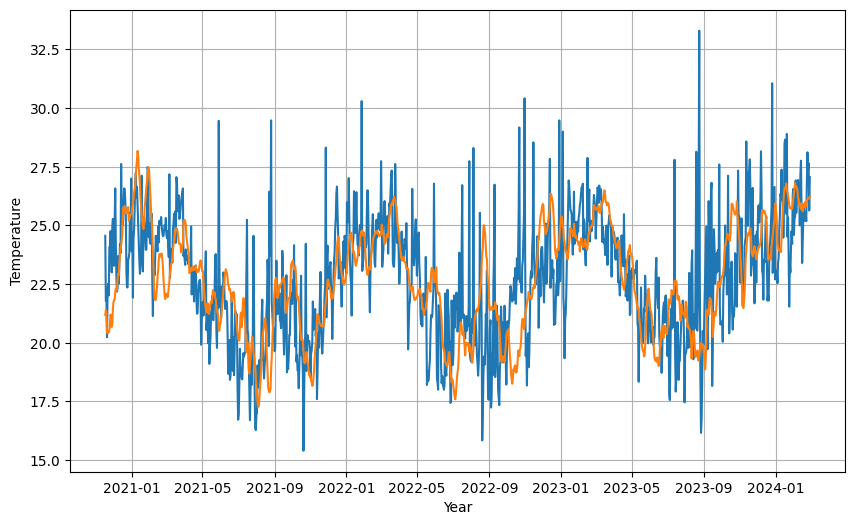

In [47]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [48]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

4.938657938281901
1.6700567139282734


# CNN-LSTM

In [49]:
series = series.round(1)
#print(series)
series1 = tf.expand_dims(series, axis=-1)
ds = tf.data.Dataset.from_tensor_slices(series1[:20])
for val in ds:
    print(val.numpy())

[23.6]
[22.6]
[21.7]
[23.7]
[22.6]
[19.1]
[18.5]
[18.5]
[19.1]
[20.6]
[20.5]
[18.9]
[16.6]
[18.8]
[26.7]
[19.1]
[19.7]
[17.7]
[18.5]
[18.9]


In [50]:
dataset = ds.window(5, shift=1)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[23.6] [22.6] [21.7] [23.7] [22.6] 
[22.6] [21.7] [23.7] [22.6] [19.1] 
[21.7] [23.7] [22.6] [19.1] [18.5] 
[23.7] [22.6] [19.1] [18.5] [18.5] 
[22.6] [19.1] [18.5] [18.5] [19.1] 
[19.1] [18.5] [18.5] [19.1] [20.6] 
[18.5] [18.5] [19.1] [20.6] [20.5] 
[18.5] [19.1] [20.6] [20.5] [18.9] 
[19.1] [20.6] [20.5] [18.9] [16.6] 
[20.6] [20.5] [18.9] [16.6] [18.8] 
[20.5] [18.9] [16.6] [18.8] [26.7] 
[18.9] [16.6] [18.8] [26.7] [19.1] 
[16.6] [18.8] [26.7] [19.1] [19.7] 
[18.8] [26.7] [19.1] [19.7] [17.7] 
[26.7] [19.1] [19.7] [17.7] [18.5] 
[19.1] [19.7] [17.7] [18.5] [18.9] 
[19.7] [17.7] [18.5] [18.9] 
[17.7] [18.5] [18.9] 
[18.5] [18.9] 
[18.9] 


In [51]:
dataset = ds.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

[23.6] [22.6] [21.7] [23.7] [22.6] 
[22.6] [21.7] [23.7] [22.6] [19.1] 
[21.7] [23.7] [22.6] [19.1] [18.5] 
[23.7] [22.6] [19.1] [18.5] [18.5] 
[22.6] [19.1] [18.5] [18.5] [19.1] 
[19.1] [18.5] [18.5] [19.1] [20.6] 
[18.5] [18.5] [19.1] [20.6] [20.5] 
[18.5] [19.1] [20.6] [20.5] [18.9] 
[19.1] [20.6] [20.5] [18.9] [16.6] 
[20.6] [20.5] [18.9] [16.6] [18.8] 
[20.5] [18.9] [16.6] [18.8] [26.7] 
[18.9] [16.6] [18.8] [26.7] [19.1] 
[16.6] [18.8] [26.7] [19.1] [19.7] 
[18.8] [26.7] [19.1] [19.7] [17.7] 
[26.7] [19.1] [19.7] [17.7] [18.5] 
[19.1] [19.7] [17.7] [18.5] [18.9] 


In [52]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
    print(window.numpy())

[[23.6]
 [22.6]
 [21.7]
 [23.7]
 [22.6]]
[[22.6]
 [21.7]
 [23.7]
 [22.6]
 [19.1]]
[[21.7]
 [23.7]
 [22.6]
 [19.1]
 [18.5]]
[[23.7]
 [22.6]
 [19.1]
 [18.5]
 [18.5]]
[[22.6]
 [19.1]
 [18.5]
 [18.5]
 [19.1]]
[[19.1]
 [18.5]
 [18.5]
 [19.1]
 [20.6]]
[[18.5]
 [18.5]
 [19.1]
 [20.6]
 [20.5]]
[[18.5]
 [19.1]
 [20.6]
 [20.5]
 [18.9]]
[[19.1]
 [20.6]
 [20.5]
 [18.9]
 [16.6]]
[[20.6]
 [20.5]
 [18.9]
 [16.6]
 [18.8]]
[[20.5]
 [18.9]
 [16.6]
 [18.8]
 [26.7]]
[[18.9]
 [16.6]
 [18.8]
 [26.7]
 [19.1]]
[[16.6]
 [18.8]
 [26.7]
 [19.1]
 [19.7]]
[[18.8]
 [26.7]
 [19.1]
 [19.7]
 [17.7]]
[[26.7]
 [19.1]
 [19.7]
 [17.7]
 [18.5]]
[[19.1]
 [19.7]
 [17.7]
 [18.5]
 [18.9]]


In [53]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
    print(x.numpy(), y.numpy())

[[23.6]
 [22.6]
 [21.7]
 [23.7]] [[22.6]]
[[22.6]
 [21.7]
 [23.7]
 [22.6]] [[19.1]]
[[21.7]
 [23.7]
 [22.6]
 [19.1]] [[18.5]]
[[23.7]
 [22.6]
 [19.1]
 [18.5]] [[18.5]]
[[22.6]
 [19.1]
 [18.5]
 [18.5]] [[19.1]]
[[19.1]
 [18.5]
 [18.5]
 [19.1]] [[20.6]]
[[18.5]
 [18.5]
 [19.1]
 [20.6]] [[20.5]]
[[18.5]
 [19.1]
 [20.6]
 [20.5]] [[18.9]]
[[19.1]
 [20.6]
 [20.5]
 [18.9]] [[16.6]]
[[20.6]
 [20.5]
 [18.9]
 [16.6]] [[18.8]]
[[20.5]
 [18.9]
 [16.6]
 [18.8]] [[26.7]]
[[18.9]
 [16.6]
 [18.8]
 [26.7]] [[19.1]]
[[16.6]
 [18.8]
 [26.7]
 [19.1]] [[19.7]]
[[18.8]
 [26.7]
 [19.1]
 [19.7]] [[17.7]]
[[26.7]
 [19.1]
 [19.7]
 [17.7]] [[18.5]]
[[19.1]
 [19.7]
 [17.7]
 [18.5]] [[18.9]]


In [54]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
    print(x.numpy(), y.numpy())

[[20.6]
 [20.5]
 [18.9]
 [16.6]] [[18.8]]
[[23.7]
 [22.6]
 [19.1]
 [18.5]] [[18.5]]
[[20.5]
 [18.9]
 [16.6]
 [18.8]] [[26.7]]
[[23.6]
 [22.6]
 [21.7]
 [23.7]] [[22.6]]
[[22.6]
 [21.7]
 [23.7]
 [22.6]] [[19.1]]
[[16.6]
 [18.8]
 [26.7]
 [19.1]] [[19.7]]
[[26.7]
 [19.1]
 [19.7]
 [17.7]] [[18.5]]
[[19.1]
 [19.7]
 [17.7]
 [18.5]] [[18.9]]
[[18.8]
 [26.7]
 [19.1]
 [19.7]] [[17.7]]
[[22.6]
 [19.1]
 [18.5]
 [18.5]] [[19.1]]
[[21.7]
 [23.7]
 [22.6]
 [19.1]] [[18.5]]
[[18.5]
 [18.5]
 [19.1]
 [20.6]] [[20.5]]
[[19.1]
 [20.6]
 [20.5]
 [18.9]] [[16.6]]
[[19.1]
 [18.5]
 [18.5]
 [19.1]] [[20.6]]
[[18.9]
 [16.6]
 [18.8]
 [26.7]] [[19.1]]
[[18.5]
 [19.1]
 [20.6]
 [20.5]] [[18.9]]


In [55]:
dataset = ds.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
    print("x = ", x.numpy())
    print("y = ", y.numpy())
    print("*"*25)

x =  [[[18.5]
  [19.1]
  [20.6]
  [20.5]]

 [[20.5]
  [18.9]
  [16.6]
  [18.8]]]
y =  [[[18.9]]

 [[26.7]]]
*************************
x =  [[[21.7]
  [23.7]
  [22.6]
  [19.1]]

 [[18.9]
  [16.6]
  [18.8]
  [26.7]]]
y =  [[[18.5]]

 [[19.1]]]
*************************
x =  [[[18.8]
  [26.7]
  [19.1]
  [19.7]]

 [[22.6]
  [21.7]
  [23.7]
  [22.6]]]
y =  [[[17.7]]

 [[19.1]]]
*************************
x =  [[[19.1]
  [19.7]
  [17.7]
  [18.5]]

 [[19.1]
  [18.5]
  [18.5]
  [19.1]]]
y =  [[[18.9]]

 [[20.6]]]
*************************
x =  [[[26.7]
  [19.1]
  [19.7]
  [17.7]]

 [[23.7]
  [22.6]
  [19.1]
  [18.5]]]
y =  [[[18.5]]

 [[18.5]]]
*************************
x =  [[[20.6]
  [20.5]
  [18.9]
  [16.6]]

 [[23.6]
  [22.6]
  [21.7]
  [23.7]]]
y =  [[[18.8]]

 [[22.6]]]
*************************
x =  [[[19.1]
  [20.6]
  [20.5]
  [18.9]]

 [[16.6]
  [18.8]
  [26.7]
  [19.1]]]
y =  [[[16.6]]

 [[19.7]]]
*************************
x =  [[[22.6]
  [19.1]
  [18.5]
  [18.5]]

 [[18.5]
  [18.5]
 

In [56]:
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

In [57]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """
    To create a window dataset given a numpy as input

    Returns: A prefetched tensorflow dataset
    """
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [59]:
'''tracker = EmissionsTracker(
    project_name="treino com CNN-LSTM parte I",
    output_file=codecarbon_output,
    measure_power_secs=0,
    log_level='critical'
)

tracker.start()'''

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

'''emissions: float = tracker.stop()
print(f"emissions={emissions}")'''

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(4795,)
Epoch 1/100
19/19 [==============================] - 14s 363ms/step - loss: 93.3204 - mae: 93.8184 - lr: 1.0000e-08
Epoch 2/100
19/19 [==============================] - 11s 573ms/step - loss: 87.8819 - mae: 88.3803 - lr: 1.1220e-08
Epoch 3/100
19/19 [==============================] - 13s 628ms/step - loss: 80.7090 - mae: 81.2077 - lr: 1.2589e-08
Epoch 4/100
19/19 [==============================] - 13s 696ms/step - loss: 72.6585 - mae: 73.1578 - lr: 1.4125e-08
Epoch 5/100
19/19 [==============================] - 10s 506ms/step - loss: 63.8013 - mae: 64.3010 - lr: 1.5849e-08
Epoch 6/100
19/19 [==============================] - 7s 373ms/step - loss: 53.9439 - mae: 54.4438 - lr: 1.7783e-08
Epoch 7/100
19/19 [==============================] - 10s 404ms/step - loss: 42.9245 - mae: 43.4243 - lr: 1.9953e-08
Epoch 8/100
19/19 [=

'emissions: float = tracker.stop()\nprint(f"emissions={emissions}")'

(1e-08, 0.0001, 0.0, 60.0)

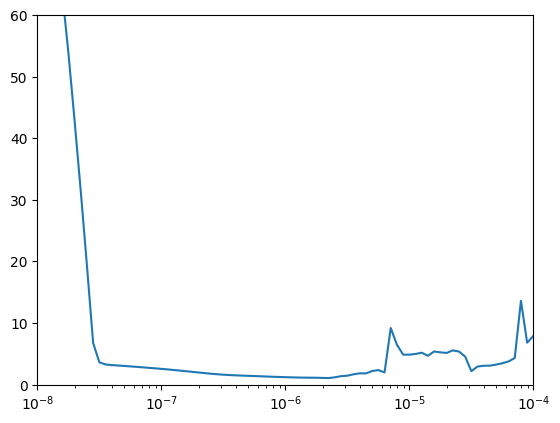

In [60]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [61]:
'''tracker = EmissionsTracker(
    project_name="treino com CNN-LSTM parte I",
    output_file=codecarbon_output,
    measure_power_secs=0,
    log_level='critical'
)

tracker.start()
'''

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7, momentum = 0.9)
#optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)
'''
emissions: float = tracker.stop()
print(f"emissions={emissions}")
'''

Epoch 1/500
48/48 [==============================] - 13s 157ms/step - loss: 5.7161 - mae: 6.1936
Epoch 2/500
48/48 [==============================] - 7s 145ms/step - loss: 4.4814 - mae: 4.9498
Epoch 3/500
48/48 [==============================] - 10s 198ms/step - loss: 3.8687 - mae: 4.3300
Epoch 4/500
48/48 [==============================] - 7s 143ms/step - loss: 3.4799 - mae: 3.9362
Epoch 5/500
48/48 [==============================] - 9s 190ms/step - loss: 3.1864 - mae: 3.6385
Epoch 6/500
48/48 [==============================] - 7s 147ms/step - loss: 2.9383 - mae: 3.3869
Epoch 7/500
48/48 [==============================] - 8s 156ms/step - loss: 2.7171 - mae: 3.1630
Epoch 8/500
48/48 [==============================] - 9s 193ms/step - loss: 2.5192 - mae: 2.9627
Epoch 9/500
48/48 [==============================] - 8s 169ms/step - loss: 2.3420 - mae: 2.7836
Epoch 10/500
48/48 [==============================] - 9s 179ms/step - loss: 2.1799 - mae: 2.6194
Epoch 11/500
48/48 [=================

'\nemissions: float = tracker.stop()\nprint(f"emissions={emissions}")\n'

In [62]:
def model_forecast(model, series, window_size):
    """
    Given a model object and a series for it to predict, this function will return the prediction
    """
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [63]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

186/186 [==============================] - 8s 33ms/step


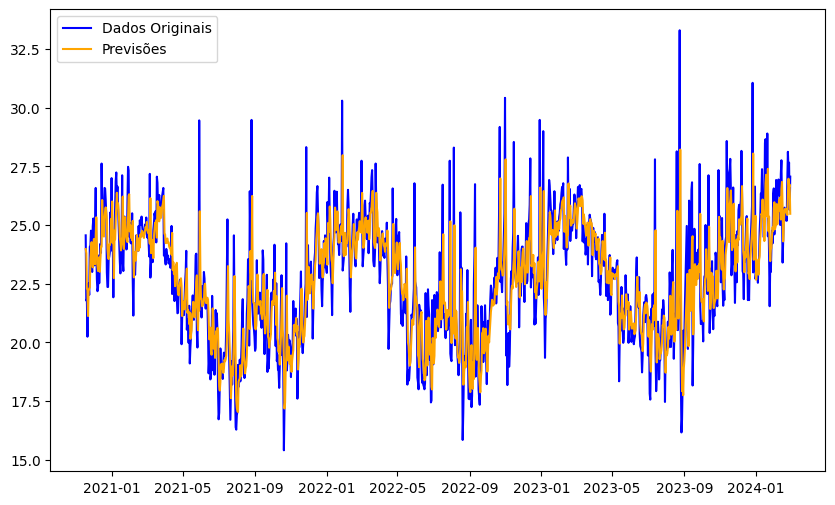

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(time_valid, x_valid, color='blue', label='Dados Originais')
plt.plot(time_valid, rnn_forecast, color='orange', label='Previsões')
plt.legend()
plt.show()

In [65]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(x_valid, rnn_forecast)
print(f'MAE: {mae:.5f}')

rmse = np.sqrt(mean_squared_error(x_valid, rnn_forecast))
print(f'RMSE: {rmse:.5f}')


MAE: 1.12068
RMSE: 1.62292
